In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import os

def process_image(img_path,f , threshold_value=220, crop_margin=10):
    # Open the image file
    img = Image.open(img_path)

    # Convert the image to grayscale (if needed)
    img = img.convert('L')

    # Convert image to numpy array
    pixel_values = np.array(img)

    # Apply the thresholding operation
    pixel_values[pixel_values > threshold_value] = 255
    pixel_values[pixel_values <= threshold_value] = 0

    # Convert numpy array back to image
    modified_img = Image.fromarray(pixel_values)

    folder_path = "lines_Pic"
    # Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)

    l = img.height
    first = True
    temp = pixel_values.shape[1] - 1
    # Iterate through the numpy array
    for i in range(pixel_values.shape[0]):  # iterate over rows
        visibableWhite = True
        for j in range(pixel_values.shape[1]):  # iterate over columns
            if pixel_values[i, j] == 0:
                l = i
                if first:
                    temp = i - 30
                    first = False
        if i - l > 30:
            # Define the crop box (left, upper, right, lower)
            crop_box = (0, temp, img.width, l + 30)
            temp = i
            l = img.height
            # Crop and save the image
            cropped_img = modified_img.crop(crop_box)
            cropped_img.save(f"{folder_path}/line_Pic_{str(f).zfill(6)}.png")
            # print(f)
            f += 1

    return f

directory_path = "/content/drive/MyDrive/Dataset/Pictures"
f = 1
for i in os.listdir(directory_path):
    img_path = os.path.join(directory_path, i)
    for j in sorted(os.listdir(img_path)):
        path = os.path.join(img_path, j)
        print(path)
        f = process_image(path, f)




/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0001.jpg
/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0002.jpg
/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0003.jpg
/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0004.jpg
/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0005.jpg
/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0006.jpg
/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0007.jpg
/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0008.jpg
/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0009.jpg
/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0010.jpg
/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0011.jpg
/content/drive/MyDrive/Dataset/Pictures/Vazir-Italic/Vazir-Italic_page-0012.jpg
/content/drive/MyDrive/Dataset/Pictures/

In [ ]:
!pip install tqdm

import os
from PIL import Image, ImageOps
import numpy as np
from tqdm import tqdm

def process_image(img_path, folder_path, f):
    img = Image.open(img_path)
    pixel_values = np.array(img)
    l = -50
    first = True
    temp = pixel_values.shape[1] - 1

    # Iterate through the numpy array
    for j in range(pixel_values.shape[1]-1, -1, -1):  # iterate over columns
        for i in range(pixel_values.shape[0]):  # iterate over rows
            if pixel_values[i, j] == 0:
                l = j
                if first:
                    temp = l + 5
                    first = False
        if l - j > 13:
            # Define the crop box (left, upper, right, lower)
            crop_box = (l - 5, 0, temp, img.height)
            temp = j - 5
            l = -50
            cropped_img = img.crop(crop_box)
            width, height = cropped_img.size
            if width > 250 or height > 250:
                print(f)

            if width < 250 and height < 250:
                pad_width = (250 - width) // 2 if width < 250 else 0
                pad_height = (250 - height) // 2 if height < 250 else 0
                padding = (pad_width, pad_height, pad_width, pad_height)
                padded_img = ImageOps.expand(cropped_img, padding, fill='white')
            else:
                padded_img = cropped_img

            # Save the processed image
            padded_img.save(os.path.join(folder_path, f"word_pic_{str(f).zfill(7)}.png"))
            f += 1

    return f

def process_all_images_in_folder(cropped_images_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    f = 1
    for i in tqdm(sorted(os.listdir(cropped_images_folder)), desc="Processing images"):
        img_path = os.path.join(cropped_images_folder, i)
        f = process_image(img_path, output_folder, f)

# Define the paths
cropped_images_folder = "/content/lines_Pic"
output_folder = "/content/words_pic"

# Process all images in the folder
process_all_images_in_folder(cropped_images_folder, output_folder)


Processing images: 100%|██████████| 2634/2634 [14:57<00:00,  2.93it/s]


In [ ]:
import os
print(len(os.listdir("/content/words_pic")))

31016


In [ ]:
# !apt-get install rar
# !zip "/content/words_pic.zip" "/content/words_pic"
# !rar a "/content/words_pic" "/content/words_pic"

!unzip "/content/drive/MyDrive/words_pic.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/words_pic/word_pic_0026017.png  
  inflating: /content/words_pic/word_pic_0026018.png  
  inflating: /content/words_pic/word_pic_0026019.png  
  inflating: /content/words_pic/word_pic_0026020.png  
  inflating: /content/words_pic/word_pic_0026021.png  
  inflating: /content/words_pic/word_pic_0026022.png  
  inflating: /content/words_pic/word_pic_0026023.png  
  inflating: /content/words_pic/word_pic_0026024.png  
  inflating: /content/words_pic/word_pic_0026025.png  
  inflating: /content/words_pic/word_pic_0026026.png  
  inflating: /content/words_pic/word_pic_0026027.png  
  inflating: /content/words_pic/word_pic_0026028.png  
  inflating: /content/words_pic/word_pic_0026029.png  
  inflating: /content/words_pic/word_pic_0026030.png  
  inflating: /content/words_pic/word_pic_0026031.png  
  inflating: /content/words_pic/word_pic_0026032.png  
  inflating: /content/words_pic/word_pic_0026033.png  
  inflating: /

In [13]:
import re
import os
import csv

def separate_persian_words(file_path):
    # Read the content of the file
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Pattern to find Persian words including non-breaking space (\u200c)
    persian_pattern = re.compile(r'[\u0600-\u06FF\u200c.]+')

    # Find all Persian words in the content
    persian_words = persian_pattern.findall(content)

    # Replace any instance of non-breaking space (\u200c) within words with regular space
    persian_words = [word.replace('\u200c', ' ') for word in persian_words]

    return persian_words

def process_all_txt_files(directory_path):
    all_words = []
    word_count = 0

    # List all files in the directory
    for i in range(1,len(os.listdir(directory_path))+1):
        file_path = os.path.join(directory_path, f"{i}.txt")
        words = separate_persian_words(file_path)

        # Append words with their respective counts
        all_words.extend(words)
        word_count += len(words)


    return all_words, word_count

def write_words_to_csv(words, output_csv):
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Token', 'Number'])  # Write header
        for idx, word in enumerate(words):
            csv_writer.writerow([word, idx + 1])

# Path to the directory containing the txt files
directory_path = '/content/drive/MyDrive/Dataset/Labels'

# Process all txt files in the directory
words, total_word_count = process_all_txt_files(directory_path)

# Generate CSV file with tokens and their numbers
output_csv = '/content/drive/MyDrive/Dataset/labels_with_numbers.csv'
write_words_to_csv(words, output_csv)

print(f"Total number of Persian words: {total_word_count}")
print("Extracted Persian words:", words)
print(f"CSV file saved with tokens and their numbers: {output_csv}")


Total number of Persian words: 31016
Extracted Persian words: ['ایران', '،', 'کشوری', 'با', 'تاریخ', 'و', 'تمدنی', 'چند', 'هزار', 'ساله', '،', 'یکی', 'از', 'کهن ترین', 'و', 'مهم ترین', 'تمدن های', 'جهان', 'به', 'شمار', 'می آید', '.', 'این', 'سرزمین', 'پهناور', '،', 'که', 'در', 'منطقه', 'خاورمیانه', 'واقع', 'شده', 'است', '،', 'از', 'شمال', 'به', 'دریای', 'خزر', 'و', 'از', 'جنوب', 'به', 'خلیج', 'فارس', 'و', 'دریای', 'عمان', 'محدود', 'می شود', '.', 'ایران', 'دارای', 'میراث', 'فرهنگی', 'غنی', 'است', 'که', 'در', 'آثار', 'باستانی', '،', 'معماری', '،', 'هنر', 'و', 'ادبیات', 'آن', 'منعکس', 'شده', 'است', '.', 'از', 'برجسته ترین', 'آثار', 'تاریخی', 'می توان', 'به', 'تخت', 'جمشید', '،', 'نقش', 'رستم', '،', 'و', 'شهر', 'تاریخی', 'اصفهان', 'اشاره', 'کرد', 'که', 'هر', 'ساله', 'گردشگران', 'بسیاری', 'را', 'به', 'خود', 'جذب', 'می کند', '.', 'شعرای', 'بزرگی', 'چون', 'حافظ', '،', 'سعدی', 'و', 'فردوسی', '،', 'در', 'ادبیات', 'فارسی', 'آثاری', 'ماندگار', 'خلق', 'کرده اند', 'که', 'همچنان', 'الهام بخش', 'نسل 

In [ ]:
words[31014]

'دارد'

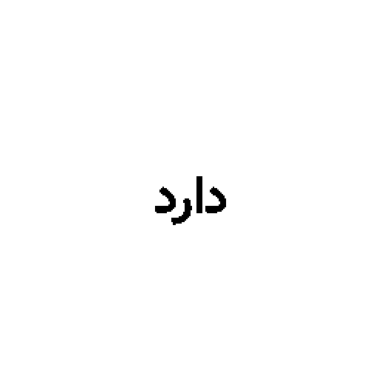

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


img = Image.open("/content/words_pic/word_pic_0031015.png")

# نمایش تصویر با استفاده از matplotlib
plt.imshow(img, cmap='gray')  # استفاده از cmap='gray' برای تصاویر سیاه و سفید
plt.axis('off')  # حذف محور‌ها
plt.show()

In [ ]:
import os

def count_files(directory):
    total_files = 0

    for root, dirs, files in os.walk(directory):
        total_files += len(files)

    return total_files

folder_path = '/content/words_pic'  # مسیر پوشه مورد نظر را وارد کنید
num_files = count_files(folder_path)
print(f"تعداد کل فایل‌ها در '{folder_path}' برابر است با: {num_files}")


تعداد کل فایل‌ها در '/content/words_pic' برابر است با: 31016


In [ ]:
img = Image.open("/content/words_pic/word_pic_0000001.png")
pixel_values = np.array(img)
pixel_values.shape

(249, 249)

In [ ]:
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
inp_dir='/content/words_pic/'
df=pd.read_csv('/content/drive/MyDrive/Dataset/labels_with_numbers.csv')

image_data=[]
labels=[]

for i in tqdm(range(len(words)), total=len(words), desc="Preprocessing Images"):
    img_name='word_pic_' + str(i+1).zfill(7)+'.png'
    img=tf.keras.preprocessing.image.load_img(os.path.join(inp_dir, img_name), target_size=(120, 120), color_mode="grayscale")
    img=tf.keras.preprocessing.image.img_to_array(img)
    img=img/255.0
    image_data.append(img)
    labels.append(words[i])

Preprocessing Images: 100%|██████████| 31016/31016 [00:16<00:00, 1870.59it/s]


In [ ]:
print(len(image_data))
print(len(labels))

31016
31016


Original shape: (120, 120, 1)


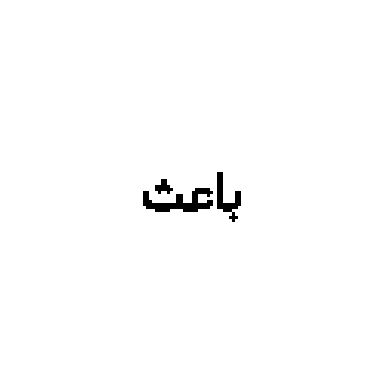

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# فرض می‌کنیم image_data آرایه numpy حاوی داده‌های تصویری باشد
# بررسی شکل داده‌ها
print("Original shape:", image_data[30005].shape)

# تبدیل نوع داده به uint8 و تغییر شکل به (ارتفاع، عرض)
image_uint8 = (image_data[30005] * 255).astype(np.uint8).reshape((image_data[30005].shape[0], image_data[30005].shape[1]))

# ساختن تصویر از آرایه numpy
modified_img = Image.fromarray(image_uint8)

# نمایش تصویر با استفاده از matplotlib
plt.imshow(modified_img, cmap='gray')  # استفاده از cmap='gray' برای تصاویر سیاه و سفید
plt.axis('off')  # حذف محور‌ها
plt.show()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, LSTM, Dense, Flatten, MaxPool2D, Dropout, MaxPooling2D, TimeDistributed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [15]:
# image_data = np.array(image_data)
labels = np.array(words)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)
# X_train = image_data
# y_train = labels


In [ ]:
X_train[0].shape

(120, 120, 1)

In [ ]:
# Reshape input data
X_train = np.reshape(X_train, (-1, 120, 120, 1))
# X_test = np.reshape(X_test, (-1, 120, 120, 1))
X_train.shape

(31016, 120, 120, 1)

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.fit_transform(y_test)

In [17]:
len(set(y_train_encoded))

777

In [ ]:
# Define the CNN model
cnn_model =Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(len(set(y_train_encoded)), activation='softmax'))

cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
# Train the model
cnn_history = cnn_model.fit(X_train, y_train_encoded, epochs=20, batch_size=32)

Epoch 1/20
970/970 [==============================] - 20s 16ms/step - loss: 3.7063 - acc: 0.3525
Epoch 2/20
970/970 [==============================] - 15s 15ms/step - loss: 1.7262 - acc: 0.6393
Epoch 3/20
970/970 [==============================] - 14s 14ms/step - loss: 0.8472 - acc: 0.7788
Epoch 4/20
970/970 [==============================] - 14s 14ms/step - loss: 0.4711 - acc: 0.8621
Epoch 5/20
970/970 [==============================] - 14s 15ms/step - loss: 0.2860 - acc: 0.9099
Epoch 6/20
970/970 [==============================] - 14s 15ms/step - loss: 0.1902 - acc: 0.9388
Epoch 7/20
970/970 [==============================] - 15s 15ms/step - loss: 0.1474 - acc: 0.9529
Epoch 8/20
970/970 [==============================] - 14s 15ms/step - loss: 0.1096 - acc: 0.9646
Epoch 9/20
970/970 [==============================] - 14s 15ms/step - loss: 0.0957 - acc: 0.9693
Epoch 10/20
970/970 [==============================] - 14s 15ms/step - loss: 0.0799 - acc: 0.9748
Epoch 11/20
970/970 [========

In [11]:
from keras.models import load_model

# cnn_model.save('my_model.h5')
# del model  # deletes the existing model

cnn_model = load_model('my_model.h5')

In [ ]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_acc)

22/22 [==============================] - 4s 170ms/step - loss: 48.6363 - acc: 0.0000e+00
Test Accuracy: 0.0


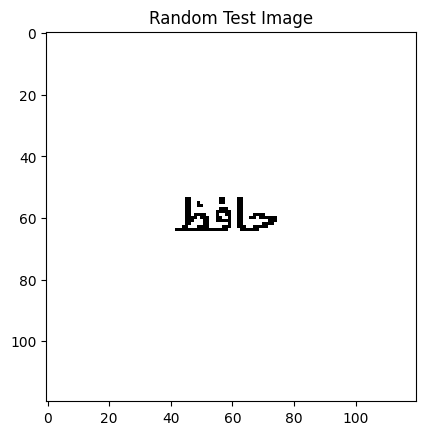

1/1 [==============================] - 0s 27ms/step
[267]
Predicted Label: حافظ


In [ ]:
import random
import matplotlib.pyplot as plt

# Select a random index from the test dataset
random_idx = random.randint(0, len(X_train) - 1)
random_image = X_train[random_idx]

# Display the image
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title('Random Test Image')
plt.show()

# Reshape the image to match the model's input shape
random_image_reshaped = np.expand_dims(random_image, axis=0)

# Predict the class
predicted_class = cnn_model.predict(random_image_reshaped)
print([np.argmax(predicted_class)])
predicted_label = label_encoder.inverse_transform([np.argmax(predicted_class)])

print("Predicted Label:", predicted_label[0])


In [23]:
from PIL import Image, ImageDraw
import numpy as np
import os

def process_image(img_path,f , threshold_value=220, crop_margin=10):
    # Open the image file
    img = Image.open(img_path)

    # Convert the image to grayscale (if needed)
    img = img.convert('L')

    # Convert image to numpy array
    pixel_values = np.array(img)

    # Apply the thresholding operation
    pixel_values[pixel_values > threshold_value] = 255
    pixel_values[pixel_values <= threshold_value] = 0

    # Convert numpy array back to image
    modified_img = Image.fromarray(pixel_values)

    folder_path = "lines_Pic_test"
    # Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)

    l = img.height
    first = True
    temp = pixel_values.shape[1] - 1
    # Iterate through the numpy array
    for i in range(pixel_values.shape[0]):  # iterate over rows
        visibableWhite = True
        for j in range(pixel_values.shape[1]):  # iterate over columns
            if pixel_values[i, j] == 0:
                l = i
                if first:
                    temp = i - 30
                    first = False
        if i - l > 30:
            # Define the crop box (left, upper, right, lower)
            crop_box = (0, temp, img.width, l + 30)
            temp = i
            l = img.height
            # Crop and save the image
            cropped_img = modified_img.crop(crop_box)
            cropped_img.save(f"{folder_path}/line_Pic_test_{str(f).zfill(6)}.png")
            # print(f)
            f += 1

    return f

pic_path = "/content/drive/MyDrive/Dataset/Pictures/Vazir-Bold-Italic/Vazir-Bold-Italic_page-0006.jpg"
f = 1
f = process_image(pic_path, f)





In [24]:
!pip install tqdm

import os
from PIL import Image, ImageOps
import numpy as np
from tqdm import tqdm

def process_image(img_path, folder_path, f):
    img = Image.open(img_path)
    pixel_values = np.array(img)
    l = -50
    first = True
    temp = pixel_values.shape[1] - 1

    # Iterate through the numpy array
    for j in range(pixel_values.shape[1]-1, -1, -1):  # iterate over columns
        for i in range(pixel_values.shape[0]):  # iterate over rows
            if pixel_values[i, j] == 0:
                l = j
                if first:
                    temp = l + 5
                    first = False
        if l - j > 13:
            # Define the crop box (left, upper, right, lower)
            crop_box = (l - 5, 0, temp, img.height)
            temp = j - 5
            l = -50
            cropped_img = img.crop(crop_box)
            width, height = cropped_img.size
            if width > 250 or height > 250:
                print(f)

            if width < 250 and height < 250:
                pad_width = (250 - width) // 2 if width < 250 else 0
                pad_height = (250 - height) // 2 if height < 250 else 0
                padding = (pad_width, pad_height, pad_width, pad_height)
                padded_img = ImageOps.expand(cropped_img, padding, fill='white')
            else:
                padded_img = cropped_img

            # Save the processed image
            padded_img.save(os.path.join(folder_path, f"word_pic_test_{str(f).zfill(7)}.png"))
            f += 1

    return f

def process_all_images_in_folder(cropped_images_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    f = 1
    for i in tqdm(sorted(os.listdir(cropped_images_folder)), desc="Processing images"):
        img_path = os.path.join(cropped_images_folder, i)
        f = process_image(img_path, output_folder, f)

# Define the paths
cropped_images_folder = "/content/lines_Pic_test"
output_folder = "/content/words_pic_test"

# Process all images in the folder
process_all_images_in_folder(cropped_images_folder, output_folder)


Processing images: 100%|██████████| 13/13 [00:05<00:00,  2.41it/s]


In [25]:
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
inp_dir='/content/words_pic_test/'

image_data=[]

for i in tqdm(range(len(os.listdir(inp_dir))), total=len(os.listdir(inp_dir)), desc="Preprocessing Images"):
    img_name='word_pic_test_' + str(i+1).zfill(7)+'.png'
    img=tf.keras.preprocessing.image.load_img(os.path.join(inp_dir, img_name), target_size=(120, 120), color_mode="grayscale")
    img=tf.keras.preprocessing.image.img_to_array(img)
    img=img/255.0
    image_data.append(img)

Preprocessing Images: 100%|██████████| 124/124 [00:00<00:00, 2332.44it/s]


In [26]:
image_data = np.array(image_data)

# Split the data
# X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)
X_train = image_data

# Reshape input data
X_train = np.reshape(X_train, (-1, 120, 120, 1))
# X_test = np.reshape(X_test, (-1, 120, 120, 1))
X_train.shape

(124, 120, 120, 1)

In [27]:
import random
import matplotlib.pyplot as plt

directory_path = "/content/words_pic_test"
text = ""
f = 1
for i in X_train:

    random_image = i

    # Display the image
    # plt.imshow(random_image.squeeze(), cmap='gray')
    # plt.title('Random Test Image')
    # plt.show()

    # Reshape the image to match the model's input shape
    random_image_reshaped = np.expand_dims(random_image, axis=0)

    # Predict the class
    predicted_class = cnn_model.predict(random_image_reshaped)
    # print([np.argmax(predicted_class)])
    predicted_label = label_encoder.inverse_transform([np.argmax(predicted_class)])
    text = text + " " + predicted_label[0]
print(text)


1/1 [==============================] - 0s 34ms/step
[96]
1/1 [==============================] - 0s 31ms/step
[1]
1/1 [==============================] - 0s 30ms/step
[729]
1/1 [==============================] - 0s 31ms/step
[108]
1/1 [==============================] - 0s 35ms/step
[655]
1/1 [==============================] - 0s 33ms/step
[168]
1/1 [==============================] - 0s 31ms/step
[299]
1/1 [==============================] - 0s 38ms/step
[563]
1/1 [==============================] - 0s 35ms/step
[278]
1/1 [==============================] - 0s 35ms/step
[1]
1/1 [==============================] - 0s 32ms/step
[102]
1/1 [==============================] - 0s 33ms/step
[251]
1/1 [==============================] - 0s 30ms/step
[269]
1/1 [==============================] - 0s 41ms/step
[738]
1/1 [==============================] - 0s 31ms/step
[602]
1/1 [==============================] - 0s 32ms/step
[648]
1/1 [==============================] - 0s 32ms/step
[1]
1/1 [================

In [22]:
import shutil
import os

def delete_folder_with_contents(folder_path):
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"The folder '{folder_path}' and its contents have been deleted.")
    else:
        print(f"The folder '{folder_path}' does not exist.")

# مثال استفاده
folder_path = "/content/lines_Pic_test"
delete_folder_with_contents(folder_path)
folder_path = "/content/words_pic_test"
delete_folder_with_contents(folder_path)


The folder '/content/lines_Pic_test' and its contents have been deleted.
The folder '/content/words_pic_test' and its contents have been deleted.


In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import os

# Open the image file
img_path = "/content/1.png"
img = Image.open(img_path)

# Convert the image to grayscale (if needed)
img = img.convert('L')

# Convert image to numpy array
pixel_values = np.array(img)

# Apply the thresholding operation
threshold_value = 200
pixel_values[pixel_values > threshold_value] = 255
pixel_values[pixel_values <= threshold_value] = 0

# Convert numpy array back to image
modified_img = Image.fromarray(pixel_values)

# Display or save the modified image
modified_img.show()
modified_img.save("/content/modified_image.png")  # Save if needed


import numpy as np
pixel_values = np.array(modified_img)
print(pixel_values)

folder_path = "/content/cropped_images"

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

aaaaaa = False
bbbbbb = False
cccccc = 0
dddddd = 0
eeeeee = 0
l=-50
isi = False
temp = 0
f = 1
# Iterate through the numpy array
for i in range(pixel_values.shape[0]):  # iterate over rows
    bbbbbb = True
    for j in range(pixel_values.shape[1]):  # iterate over columns
        if pixel_values[i, j] == 0:
            if aaaaaa == False:
                cccccc = i
            aaaaaa = True
            bbbbbb = False
            eeeeee = eeeeee + 1
    if eeeeee < 10 :
        bbbbbb = True
    eeeeee = 0
    if aaaaaa == True and bbbbbb == True:
        aaaaaa = False
        bbbbbb = False
        dddddd = i
        if (dddddd - cccccc > 10):
          # Define the crop box (left, upper, right, lower)
          crop_box = (0, cccccc, img.width, dddddd)
          cropped_img = modified_img.crop(crop_box)
          cropped_img.save(f"/content/cropped_images/cropped_image{f}.png")
          f = f + 1







[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:

import os
from PIL import Image
import numpy as np

def process_image(img_path, folder_path, f):
    img = Image.open(img_path)
    pixel_values = np.array(img)
    aaaaaa = False
    bbbbbb = False
    dddddd = 0
    eeeeee = 5
    cccccc = pixel_values.shape[1] - 1
    # Iterate through the numpy array
    for j in range(pixel_values.shape[1]-1,-1,-1):  # iterate over columns
        bbbbbb = True
        # eeeeee = 6
        for i in range(pixel_values.shape[0]):  # iterate over rows
            if pixel_values[i, j] == 0:
                if aaaaaa == False:
                    cccccc = j
                aaaaaa = True
                bbbbbb = False
                # eeeeee = 5
                break
        if aaaaaa == True and bbbbbb == True:
            # if eeeeee != 0:
            #     eeeeee = eeeeee - 1
            #     continue
            # eeeeee = 5
            aaaaaa = False
            bbbbbb = False
            dddddd = j
            # Define the crop box (left, upper, right, lower)
            crop_box = (dddddd, 0, cccccc, img.height)
            cropped_img = img.crop(crop_box)
            cropped_img.save(os.path.join(folder_path, f"cropped_image{f}.png"))
            f = f + 1
    return f

def process_all_images_in_folder(cropped_images_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # List all files in the cropped_images folder
    image_files = [f for f in os.listdir(cropped_images_folder) if f.endswith('.png')]

    f = 1  # Counter for naming cropped images
    for image_file in image_files:
        img_path = os.path.join(cropped_images_folder, image_file)
        f = process_image(img_path, output_folder, f)

# Define the paths
cropped_images_folder = "/content/cropped_images"
output_folder = "/content/word_images"

# Process all images in the folder
process_all_images_in_folder(cropped_images_folder, output_folder)
